In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

## Collecting tweets on COVID-19

In [2]:
## defining keys

consumer_key= 'my_consumer_key'
consumer_secret= 'my_consumer_secret'
access_token= 'my_access_token'
access_token_secret= 'my_access_token_secret'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [3]:
### collecting and cleaning 1000 tweets on covid

def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# Create a custom search term and define the number of tweets
search_term = "#covid19 OR #covid-19 OR covid-19 OR covid19 OR #coronavirus OR coronavirus -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-02-24').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [4]:
len(tweets_no_urls)

1000

In [5]:
type(tweets_no_urls)

list

## Sentiment analysis using TextBlob

In [7]:
# Create textblob objects of the collected tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[1].polarity, sentiment_objects[1]

(0.31666666666666665,
 TextBlob("Does a nice gesture gets slated for 2 metre social distancing rule yet the PM admitted to shaking loads of people w"))

In [8]:
# Create list of polarity values and tweet texts
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[1]

[0.31666666666666665,
 'Does a nice gesture gets slated for 2 metre social distancing rule yet the PM admitted to shaking loads of people w']

In [15]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity_score", "tweet"])
pd.set_option('display.max_colwidth', None)
sentiment_df.head(10)

,polarity_score,tweet
0,0.000000,pulte Im in an urgent care getting tested for covid19 but also the flu Im not allowed to return to work in
1,0.316667,Does a nice gesture gets slated for 2 metre social distancing rule yet the PM admitted to shaking loads of people w
2,0.128571,Medical Expert Who Corrects Trump Is Now a Target of the Far Right
3,0.227273,Detroit Police Chief and 39 of his officers have tested positive for coronavirus
4,-0.400000,We start a campaign for poor people Name Food If you want to help donate below link
5,0.000000,all the mayors of Florida during peak COVID19 Spring Break
6,1.000000,best time in covid19 Lockdown21 to make children watch Ramayan and for 90s born a moment of nostalgia
7,-0.050000,CrazyBoyTayy SARS and MERS were also strains of coronavirus and theyve been around for a long time Even the seas
8,0.000000,A patient treated at St Peter Hospital in Addis Ababa for separate cases was found to be COVID19 ve 22 health w
9,-0.500000,realDonaldTrump A man with a fake tan fake hair fake schools and fake charities are telling people not to belie


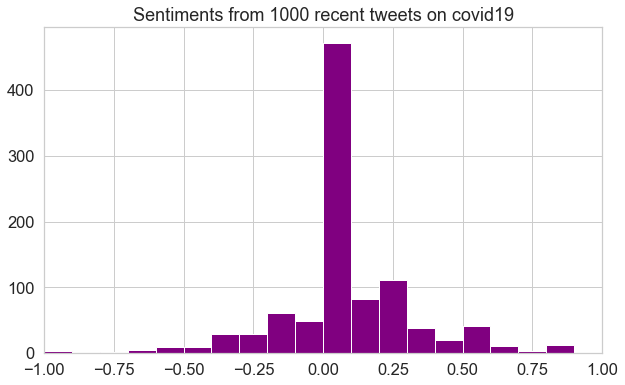

In [17]:
## Histogram of tweet sentiments

import numpy as np

bin_range = np.arange(-1, 1, 0.1)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=bin_range,
             ax=ax,
             color="purple")

plt.xlim(-1, 1)
plt.title("Sentiments from 1000 recent tweets on covid19")
plt.show()

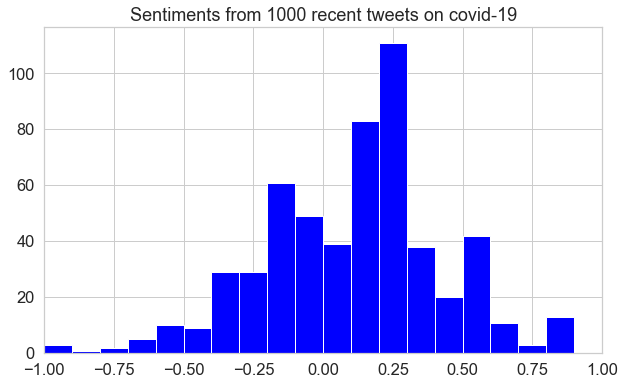

In [18]:
# Remove polarity values which equal to zero to get more valuable distribution

sentiment_df_nz = sentiment_df[sentiment_df.polarity_score != 0]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram with break at zero
sentiment_df_nz.hist(bins=bin_range,
             ax=ax,
             color="blue")

plt.xlim(-1, 1)
plt.title("Sentiments from 1000 recent tweets on covid-19")
plt.show()

In [19]:
## 10 most positive tweets about covid-19

sentiment_df_nz_sorted = sentiment_df_nz.sort_values('polarity_score', ascending=False)

pd.set_option('display.max_colwidth', None)

sentiment_df_nz_sorted.head(10)

,polarity_score,tweet
738,1.00,RTELateLateShow Hozier I have listened to Hozier singing this over and overIts a wonderful tribute to all we h
6,1.00,best time in covid19 Lockdown21 to make children watch Ramayan and for 90s born a moment of nostalgia
587,1.00,Excellent QampA with Peter Pilot covid19
947,1.00,MuradAliShahPPP amp murtazawahab1 UPA Members always best tax payers 2 Sindh Covid19 paralyzed work amp all at h
95,1.00,644 cases of coronavirus amp 4 deaths in ALThe greatest number of COVID19 cases 179 were in Jefferson County
622,1.00,The best thing Ive seen today StayAtHomeAndStaySafeStayHomeSaveLivesFlattenTheCuveCOVID19
265,0.91,Take the time Read the subtitles Very good questionsCOVID19 Coronavirus
779,0.90,Yall This is an incredible song to spread awareness about COVID19 in Liberia by my Liberian friends
598,0.90,I have a belief in the power of kindness In the eye of this incredible pandemic storm Im seeing kindness against
385,0.85,Beautifully lowCoronaUpdate StayAtHomeAndStaySafe COVID19


In [20]:
## 10 most negative tweets about covid-19

pd.set_option('display.max_colwidth', None)

sentiment_df_nz_sorted.tail(10)

,polarity_score,tweet
689,-0.70,GOPChairwoman Almost as bad as killing people When it come to your health remember Trump and the GOP have got
848,-0.70,Maybe we didnt need a coup or a revolution to remove bad leadership in Nigeria COVID19 might just take care of i
919,-0.70,SarahTheHaider Well no kidding But Im concerned with the WHOs outright campaign of lies and bad advice te
471,-0.70,People need to ramp up their anger towards the tories these fuckers destroyed the NHS coronavirus coronavirusuk
10,-0.80,Im at the airport listening to all these people theories on Coronavirus its so annoying
247,-0.80,NY Times Idiot Columnist Gets Hammered After Lying About President Trumps Remarks to Governors on Coronavirus
131,-0.85,Iran Regime report card is outrageous and disastrous CoronavirusCovid19pandemicFreeIran2020
321,-1.00,My therapist whats the worst that can happen if you dont wash your hands College age OCD me I could DIECov
759,-1.00,Despite today being our worst day in the UK yet for deaths per day we did see a decrease in detected cases by 14
351,-1.00,This is the bleak heart of the worlds deadliest coronavirus outbreak


## Word frequency analysis

In [22]:
## making a list of lists with lower case words from each tweet

lcase_words_tweets = [tweet.lower().split() for tweet in tweets_no_urls]
lcase_words_tweets[:2]

[['pulte',
  'im',
  'in',
  'an',
  'urgent',
  'care',
  'getting',
  'tested',
  'for',
  'covid19',
  'but',
  'also',
  'the',
  'flu',
  'im',
  'not',
  'allowed',
  'to',
  'return',
  'to',
  'work',
  'in'],
 ['does',
  'a',
  'nice',
  'gesture',
  'gets',
  'slated',
  'for',
  '2',
  'metre',
  'social',
  'distancing',
  'rule',
  'yet',
  'the',
  'pm',
  'admitted',
  'to',
  'shaking',
  'loads',
  'of',
  'people',
  'w']]

In [23]:
# Flattened list of all words across all tweets
all_words_tweets = list(itertools.chain(*lcase_words_tweets))

# Create counter
counts_no_urls = collections.Counter(all_words_tweets)
counts_no_urls.most_common(10)

[('the', 551),
 ('to', 429),
 ('coronavirus', 332),
 ('covid19', 314),
 ('of', 304),
 ('in', 250),
 ('a', 245),
 ('and', 209),
 ('is', 198),
 ('for', 194)]

In [26]:
## downloading stop words library in order to filter out stop words, commonly ysed words like 'a' or 'the'

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\I22247\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [27]:
# Remove stop words from each tweet list of words with nested list comprehension
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in lcase_words_tweets]

tweets_nsw[1]

['nice',
 'gesture',
 'gets',
 'slated',
 '2',
 'metre',
 'social',
 'distancing',
 'rule',
 'yet',
 'pm',
 'admitted',
 'shaking',
 'loads',
 'people',
 'w']

In [29]:
# same counter of most common words now without stop words

all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(20)

[('coronavirus', 332),
 ('covid19', 314),
 ('people', 66),
 ('trump', 56),
 ('new', 54),
 ('cases', 48),
 ('positive', 46),
 ('im', 43),
 ('amp', 40),
 ('via', 39),
 ('us', 37),
 ('covid', 35),
 ('one', 32),
 ('tested', 31),
 ('state', 31),
 ('time', 30),
 ('19', 30),
 ('crisis', 28),
 ('know', 27),
 ('test', 26)]

In [30]:
## get rid of collection words which are skewing the frequency

collection_words = ['covid19', 'covid 19', 'covid-19', 'covid', "19", "coronavirus", "virus", "corona", 'amp', '19', 'im']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [32]:
# Flatten list of words in cleaned tweets_nsw_nc
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)
counts_nsw_nc.most_common(20)

[('people', 66),
 ('trump', 56),
 ('new', 54),
 ('cases', 48),
 ('positive', 46),
 ('via', 39),
 ('us', 37),
 ('one', 32),
 ('tested', 31),
 ('state', 31),
 ('time', 30),
 ('crisis', 28),
 ('know', 27),
 ('test', 26),
 ('health', 25),
 ('deaths', 25),
 ('dont', 24),
 ('need', 24),
 ('help', 23),
 ('get', 23)]

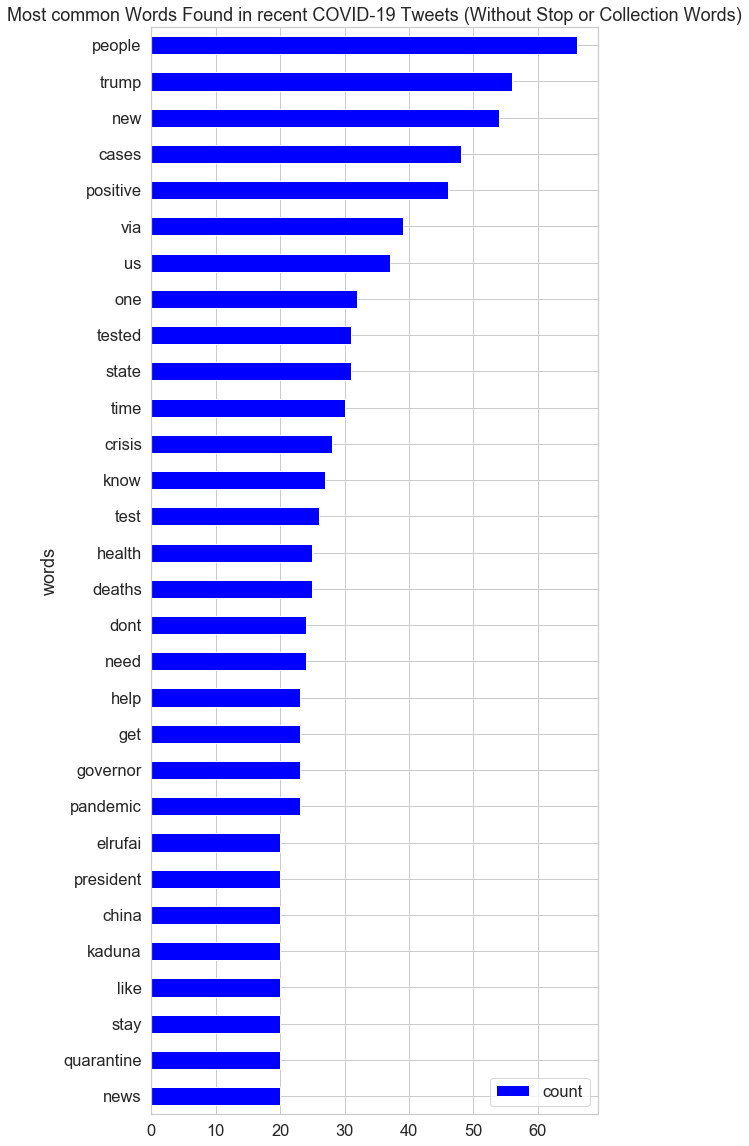

In [36]:
# plotting the most frequent words

all_words_nsw_nc_df = pd.DataFrame(counts_nsw_nc.most_common(30),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 20))

# Plot horizontal bar graph
all_words_nsw_nc_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Most common Words Found in recent COVID-19 Tweets (Without Stop or Collection Words)")
plt.show()

## network analysis

In [37]:
import nltk
from nltk import bigrams

# Create list of lists containing bigrams (n-gram for n=2) in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[1]

[('nice', 'gesture'),
 ('gesture', 'gets'),
 ('gets', 'slated'),
 ('slated', '2'),
 ('2', 'metre'),
 ('metre', 'social'),
 ('social', 'distancing'),
 ('distancing', 'rule'),
 ('rule', 'yet'),
 ('yet', 'pm'),
 ('pm', 'admitted'),
 ('admitted', 'shaking'),
 ('shaking', 'loads'),
 ('loads', 'people'),
 ('people', 'w')]

In [39]:
# Flatten list of bigrams in cleaned tweets tweets_nsw_nc
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams to determine most common bigrams (pairs of sequential words)
bigram_counts = collections.Counter(bigrams)
bigram_counts.most_common(10)

[(('tested', 'positive'), 25),
 (('kaduna', 'state'), 17),
 (('new', 'york'), 16),
 (('el', 'rufai'), 14),
 (('nasir', 'el'), 12),
 (('governor', 'kaduna'), 12),
 (('state', 'tested'), 12),
 (('via', 'youtube'), 11),
 (('rufai', 'governor'), 10),
 (('stay', 'home'), 8)]

In [41]:
## creating dataframe of most common bigrams

bigram_df = pd.DataFrame(bigram_counts.most_common(40),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(tested, positive)",25
1,"(kaduna, state)",17
2,"(new, york)",16
3,"(el, rufai)",14
4,"(nasir, el)",12
5,"(governor, kaduna)",12
6,"(state, tested)",12
7,"(via, youtube)",11
8,"(rufai, governor)",10
9,"(stay, home)",8


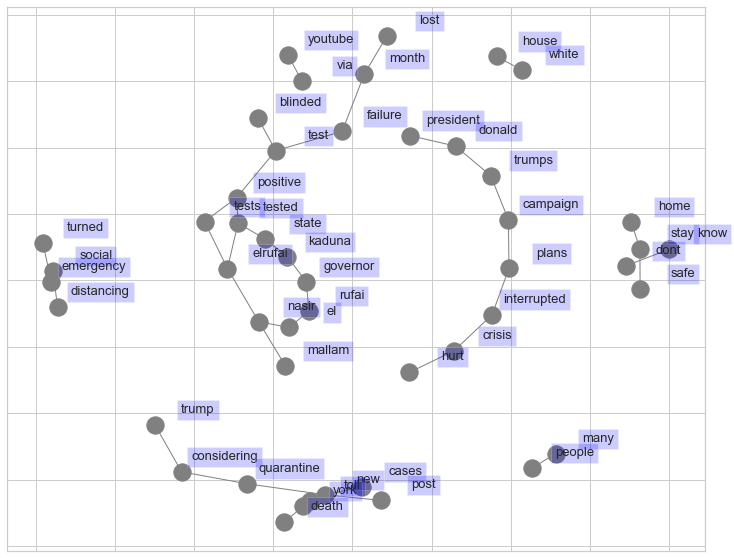

In [43]:
## Plotting network of most common bigrams

import networkx as nx

# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(12.5, 10))
pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=1,
                 edge_color='grey',
                 node_color='grey',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.2),
            horizontalalignment='center', fontsize=13)
    
plt.show()

## Exploring additional tweet attributes with Cursor

In [44]:
tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-02-24').items(500)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs

[['yes_i_vape', 'Pennsylvania, USA'],
 ['cheedansoko', 'Africa 📍'],
 ['SamForHumans', 'Seminole land'],
 ['rich4freedom', 'Somerset County New Jersey'],
 ['catalinagilp', 'Bogotá, D.C., Colombia'],
 ['FreyaSnelgroveB', 'South West, England'],
 ['KiguddeIvan_Goo', 'Kampala, Uganda'],
 ['stressed_dogs77', 'earth...for the time being '],
 ['NamulindaBrenda', 'Uganda'],
 ['Nxuba__Rhudulu', 'East Rand'],
 ['IuAffan', 'Al Khobar, Kingdom of Saudi Ar'],
 ['bayucivil1', 'Lagos, Nigeria'],
 ['shanemedlin2', 'A Very Windy Mountain '],
 ['LiberiaSam', 'Liberia'],
 ['4084Mr', 'Fresno, CA USA'],
 ['erccngrn', ''],
 ['sammydodgerocks', 'Sadness, Space'],
 ['bongsmdakes', 'Mpumalanga | Johannesburg '],
 ['letsliveinpeace', ''],
 ['effodu', 'Abuja, Nigeria'],
 ['GlobalRegina', 'Regina, SK Canada'],
 ['halfeatenmind', 'Seven Kings, Ilford, Essex'],
 ['mmucounselling', 'North West, England'],
 ['PoemsByPhil', 'Yorkshire and The Humber, Engl'],
 ['1FreeSpeak', ''],
 ['HamiltonTwpNJ', ''],
 ['RandaAndrew'

In [47]:
## Creating dataframe of handles and user-defined locations

users_locs_df = pd.DataFrame(data=users_locs, columns=('users', 'locations'))
users_locs_df.head(20)

,users,locations
0,yes_i_vape,"Pennsylvania, USA"
1,cheedansoko,Africa 📍
2,SamForHumans,Seminole land
3,rich4freedom,Somerset County New Jersey
4,catalinagilp,"Bogotá, D.C., Colombia"
5,FreyaSnelgroveB,"South West, England"
6,KiguddeIvan_Goo,"Kampala, Uganda"
7,stressed_dogs77,earth...for the time being
8,NamulindaBrenda,Uganda
9,Nxuba__Rhudulu,East Rand


In [49]:
## Replacing blanks with NaN vals

users_locs_df = users_locs_df.replace('',np.nan)
users_locs_df.head(20)

,users,locations
0,yes_i_vape,"Pennsylvania, USA"
1,cheedansoko,Africa 📍
2,SamForHumans,Seminole land
3,rich4freedom,Somerset County New Jersey
4,catalinagilp,"Bogotá, D.C., Colombia"
5,FreyaSnelgroveB,"South West, England"
6,KiguddeIvan_Goo,"Kampala, Uganda"
7,stressed_dogs77,earth...for the time being
8,NamulindaBrenda,Uganda
9,Nxuba__Rhudulu,East Rand


In [50]:
## Dropping NaN rows

users_locs_df = users_locs_df.dropna()
users_locs_df.head(20)

,users,locations
0,yes_i_vape,"Pennsylvania, USA"
1,cheedansoko,Africa 📍
2,SamForHumans,Seminole land
3,rich4freedom,Somerset County New Jersey
4,catalinagilp,"Bogotá, D.C., Colombia"
5,FreyaSnelgroveB,"South West, England"
6,KiguddeIvan_Goo,"Kampala, Uganda"
7,stressed_dogs77,earth...for the time being
8,NamulindaBrenda,Uganda
9,Nxuba__Rhudulu,East Rand


In [51]:
len(users_locs_df)

371

(-0.5, 999.5, 599.5, -0.5)

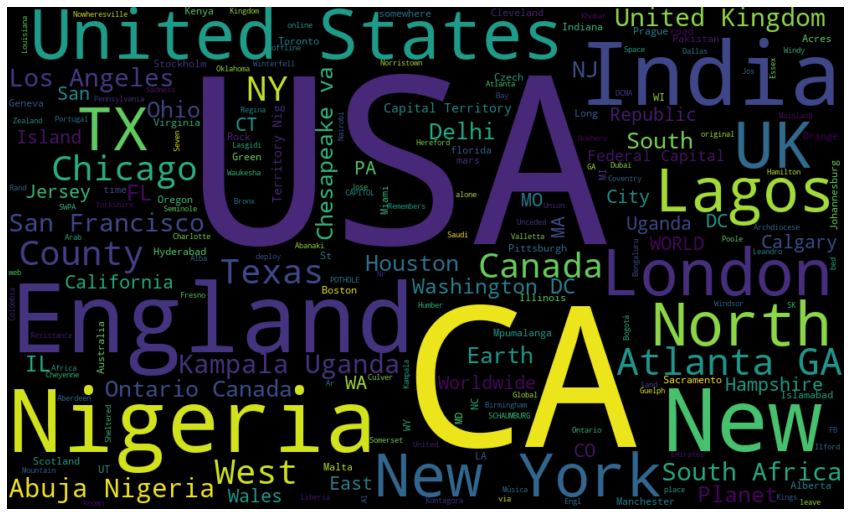

In [55]:
## turning list of locs into one big string and visualising location counts as WordCloud

all_locs_string = ' '.join(users_locs_df['locations'].tolist())

from wordcloud import WordCloud

word_cloud = WordCloud(width=1000, height=600).generate(all_locs_string)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

In [59]:
## determining most popular tweet based on count of retweets

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-02-24').items(500)

users_locs_rts = [[tweet.user.screen_name, tweet.user.location, tweet.retweet_count, tweet.created_at, tweet.text] for tweet in tweets]
users_locs_rts


[['ErrorJustin',
  'San Francisco, CA',
  0,
  datetime.datetime(2020, 3, 28, 20, 1, 40),
  'Yes Zuckerberg donating $25M to COVID-19 research is a small portion of his net worth. But you really wanna drag hi… https://t.co/R9luA2LE0p'],
 ['Nyx1269',
  'Pontoon Beach, IL',
  0,
  datetime.datetime(2020, 3, 28, 20, 1, 40),
  '@JBPritzker suspend mortgage payments in Illinois IMMEDIATELY. #Covid_19 #RENTRELIEF #mortgagefreeze #April1 https://t.co/qMIE1EJdVh'],
 ['AliMisam_Saif',
  '',
  0,
  datetime.datetime(2020, 3, 28, 20, 1, 40),
  '@Majid_Agha @Sadiajavedppp @MuradAliShahPPP @MuradAliShahPPP should be appointed as Pakistan PM from @ImranKhanPTI… https://t.co/c8rWptk24j'],
 ['mysouthldn',
  'London, England',
  0,
  datetime.datetime(2020, 3, 28, 20, 1, 40),
  'Grieving friends described the daughter as "one in a million" https://t.co/wND2HKntof'],
 ['JerameyNeely',
  'Haslet, TX',
  0,
  datetime.datetime(2020, 3, 28, 20, 1, 40),
  'Coronavirus: Illegal Aliens Want $1.2K Each in Taxp

In [61]:
## Creating dataframe with attributes including retweets and timestamp

users_locs_rts_df = pd.DataFrame(data=users_locs_rts, columns=('user', 'location', 'retweets', 'time', 'tweet'))
users_locs_rts_df.head(20)

,user,location,retweets,time,tweet
0,ErrorJustin,"San Francisco, CA",0,2020-03-28 20:01:40,Yes Zuckerberg donating $25M to COVID-19 research is a small portion of his net worth. But you really wanna drag hi… https://t.co/R9luA2LE0p
1,Nyx1269,"Pontoon Beach, IL",0,2020-03-28 20:01:40,@JBPritzker suspend mortgage payments in Illinois IMMEDIATELY. #Covid_19 #RENTRELIEF #mortgagefreeze #April1 https://t.co/qMIE1EJdVh
2,AliMisam_Saif,,0,2020-03-28 20:01:40,@Majid_Agha @Sadiajavedppp @MuradAliShahPPP @MuradAliShahPPP should be appointed as Pakistan PM from @ImranKhanPTI… https://t.co/c8rWptk24j
3,mysouthldn,"London, England",0,2020-03-28 20:01:40,"Grieving friends described the daughter as ""one in a million"" https://t.co/wND2HKntof"
4,JerameyNeely,"Haslet, TX",0,2020-03-28 20:01:40,Coronavirus: Illegal Aliens Want $1.2K Each in Taxpayer-Funded Checks https://t.co/YIXmvE1HT3 via @BreitbartNews
5,wetowayne1,"Kampala, Uganda",0,2020-03-28 20:01:40,@KagutaMuseveni Gwe covid 19 unlike this😡😡
6,bj_media,"Lagos, Nigeria",0,2020-03-28 20:01:40,El-Rufai tested positive of COVID-19. \n\nSpeechless. \n\n😔
7,laurabaran,"New York, NY",0,2020-03-28 20:01:40,People giving birth will be now be allowed to have a support person in NYC 👏🏼\nhttps://t.co/6jEpajfmYY
8,AndersonFamouss,"Los Angeles, CA",0,2020-03-28 20:01:40,@CNNPolitics Ask your leaders about Autonomous Eyewear and Microscopic Vision and how it can be used to combat COV… https://t.co/iwGvLgUQAS
9,MontessoriAngel,"Omaha, NE",0,2020-03-28 20:01:40,@oprahmagazine Oprah got Coronavirus no don’t tell me 🤦‍♀️Iove me some Oprah


In [62]:
## Sorting to see most popular tweets

users_locs_rts_df.sort_values('retweets', ascending=False)

,user,location,retweets,time,tweet
393,Independent,"London, England",4,2020-03-28 20:01:16,How is Earth Hour being commemorated this year during the coronavirus pandemic? https://t.co/PPIHBrf6cV
436,WAVY_News,"Hampton Roads, Va.",1,2020-03-28 20:01:14,LIVE NOW: Doctors answer questions on the first 'Coronavirus House Calls' episode. \nhttps://t.co/MUjKryCmkH
443,chrisvcsefalvay,"Arlington, VA",1,2020-03-28 20:01:13,My wife is selling awesome merch to help doctors and nurses on the frontlines of fighting #COVID19. Check this out! https://t.co/9STjHJtS0g
414,HinduNasir2,,1,2020-03-28 20:01:15,How comes that the Coronavirus cases are always rising up only in the night????? Now we have 30
326,messageplicity,"Saint Louis, Missouri",1,2020-03-28 20:01:20,Check out hands-free greetings for our #coronavirus era via @CNET\nhttps://t.co/7kXuQV7NJv\n#Health #SocialDistancing #PhysicalDistancing
...,...,...,...,...,...
161,PaulaRossi47,Leicester,0,2020-03-28 20:01:30,Ruth Langsford 'laughs' at Boris Johnson testing positive for coronavirus https://t.co/xfiAPCDmGt
160,AgainKataisa,the windy city,0,2020-03-28 20:01:31,"Besides https://t.co/f96D69d6jy , I recommend https://t.co/ysEdw5KaF0 as an great place to get lost in if you're in… https://t.co/unbcYMdpbh"
159,drpriaero,Aotearoa New Zealand,0,2020-03-28 20:01:31,"Fingers crossed, NZ. #StayHomeSaveLives #EliminateCovid19\n https://t.co/skHhqjop8t"
158,hannahcwiley,"Sacramento, CA",0,2020-03-28 20:01:31,"California has hit 101 COVID-19 deaths, another unfortunate milestone. And the number of confirmed cases jumped fro… https://t.co/3WFGsvUvdD"


In [63]:
# Determining timeframe over which the 500 most recent COVID-19 tweets have been posted
# firstly the earliest tweet

users_locs_rts_df['time'].min()

Timestamp('2020-03-28 20:01:10')

In [64]:
# last tweet

users_locs_rts_df['time'].max()

Timestamp('2020-03-28 20:01:40')

In [65]:
# 30 seconds
# Taking a more detailed look at the rate of COVID-19 related tweets using a groupby

users_locs_rts_df.groupby('time').count().sort_values('user')

,user,location,retweets,tweet
time,,,,
2020-03-28 20:01:10,8,8,8,8
2020-03-28 20:01:24,9,9,9,9
2020-03-28 20:01:38,11,11,11,11
2020-03-28 20:01:34,11,11,11,11
2020-03-28 20:01:39,11,11,11,11
2020-03-28 20:01:40,11,11,11,11
2020-03-28 20:01:22,12,12,12,12
2020-03-28 20:01:14,12,12,12,12
2020-03-28 20:01:29,12,12,12,12
